<a href="https://colab.research.google.com/github/Viridian01/CSE-151A-Restaurant-Revenue/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#!git clone https://github.com/Viridian01/CSE-151A-Restaurant-Revenue.git

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

We start by downloading the data and looking at the first few examples as well as basic descriptive statistics.

In [71]:

dataset = pd.read_csv("https://raw.githubusercontent.com/Viridian01/CSE-151A-Restaurant-Revenue/main/data/restaurant_data.csv")

Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese     4.0                38   
1  Restaurant 1  Downtown   Mexican     3.2                76   
2  Restaurant 2     Rural   Italian     4.7                48   
3  Restaurant 3     Rural   Italian     4.4                34   
4  Restaurant 4  Downtown  Japanese     4.9                88   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               51.55              1167                   15214   
4               75.98              3639                   40171   

   Chef Experience Years  Number of Reviews  Avg Review Length  \
0                     13                185         161.924906   
1                      8                533         148.759717   
2                     18                853          56.849189   
3                     13                 82         205.433265   
4                      9                 78         241.681584   

   Ambience Score  Service Quality Score Parking Availability  \
0             1.3                    7.0                  Yes   
1             2.6                    3.4                  Yes   
2             5.3                    6.7                   No   
3             4.6                    2.8                  Yes   
4             8.6                    2.1                   No   

   Weekend Reservations  Weekday Reservations     Revenue  
0                    13                     4   638945.52  
1                    48                     6   490207.83  
2                    27                    14   541368.62  
3                     9                    17   404556.80  
4                    37                    26  1491046.35

In [100]:
restaurants = dataset
restaurants.head()

Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese     4.0                38   
1  Restaurant 1  Downtown   Mexican     3.2                76   
2  Restaurant 2     Rural   Italian     4.7                48   
3  Restaurant 3     Rural   Italian     4.4                34   
4  Restaurant 4  Downtown  Japanese     4.9                88   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               51.55              1167                   15214   
4               75.98              3639                   40171   

   Chef Experience Years  Number of Reviews  Avg Review Length  \
0                     13                185         161.924906   
1                      8                533         148.759717   
2                     18                853          56.849189   
3                     13                 82         205.433265   
4                      9                 78         241.681584   

   Ambience Score  Service Quality Score Parking Availability  \
0             1.3                    7.0                  Yes   
1             2.6                    3.4                  Yes   
2             5.3                    6.7                   No   
3             4.6                    2.8                  Yes   
4             8.6                    2.1                   No   

   Weekend Reservations  Weekday Reservations     Revenue  
0                    13                     4   638945.52  
1                    48                     6   490207.83  
2                    27                    14   541368.62  
3                     9                    17   404556.80  
4                    37                    26  1491046.35

In [101]:
restaurants.shape

(8368, 17)

In [102]:
restaurants.describe()

Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
count  8368.000000       8368.000000         8368.000000       8368.000000   
mean      4.008258         60.212835           47.896659       3218.254900   
std       0.581474         17.399488           14.336767       1824.896053   
min       3.000000         30.000000           25.000000        604.000000   
25%       3.500000         45.000000           35.490000       1889.000000   
50%       4.000000         60.000000           45.535000       2846.500000   
75%       4.500000         75.000000           60.300000       4008.500000   
max       5.000000         90.000000           76.000000       9978.000000   

       Social Media Followers  Chef Experience Years  Number of Reviews  \
count             8368.000000            8368.000000        8368.000000   
mean             36190.621773              10.051984         523.010397   
std              18630.153330               5.516606         277.215127   
min               5277.000000               1.000000          50.000000   
25%              22592.500000               5.000000         277.000000   
50%              32518.500000              10.000000         528.000000   
75%              44566.250000              15.000000         764.250000   
max             103777.000000              19.000000         999.000000   

       Avg Review Length  Ambience Score  Service Quality Score  \
count        8368.000000     8368.000000            8368.000000   
mean          174.769974        5.521283               5.508772   
std            71.998060        2.575442               2.586552   
min            50.011717        1.000000               1.000000   
25%           113.311102        3.300000               3.200000   
50%           173.910079        5.500000               5.600000   
75%           237.406885        7.800000               7.800000   
max           299.984924       10.000000              10.000000   

       Weekend Reservations  Weekday Reservations       Revenue  
count           8368.000000           8368.000000  8.368000e+03  
mean              29.491754             29.235301  6.560706e+05  
std               20.025415             20.004277  2.674137e+05  
min                0.000000              0.000000  1.847085e+05  
25%               13.000000             13.000000  4.546514e+05  
50%               27.000000             26.000000  6.042421e+05  
75%               43.000000             43.000000  8.130942e+05  
max               88.000000             88.000000  1.531868e+06

In [103]:
print("Feature datatypes")
print(restaurants.dtypes)
print()
print("# of Missing Values")
print(pd.isna(restaurants).sum())

Feature datatypes
Name                       object
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability       object
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object

# of Missing Values
Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parki

In [104]:
print("Location:", restaurants["Location"].unique())
print("Cuisine:", restaurants["Cuisine"].unique())
print("Parking Availability:", restaurants["Parking Availability"].unique())

Location: ['Rural' 'Downtown' 'Suburban']
Cuisine: ['Japanese' 'Mexican' 'Italian' 'Indian' 'French' 'American']
Parking Availability: ['Yes' 'No']


## Features


Our dataset has the following features:
- `Name` (string): an identifier for the restaurant (`Restaurant{index}`). We will drop this feature as it serves no use to a model.
- `Location` (string): the location of the restaurant ("Rural", "Downtown", or "Suburban")
- `Cuisine` (string): the type of cuisine the restaurant serves ("Japanese", "Mexican", "Italian", "Indian", "French", "American")
- `Rating` (float): the average rating of the restaurant on a five star scale
- `Seating Capacity` (int): the total number of seats in the restaurant
- `Average Meal Price` (float): the average price of a meal at the restaurant (unknown currency)
- `Marketing Budget` (int): the budget allocated towards marketing by the restaurant (unknown unit)
- `Social Media Followers` (int): the number of followers on the restaurant's social media
- `Chef Experience Years` (int): the number of year of experience of the head chef
- `Number of Reviews` (int): the total number of reviews the restaurant has received
- `Avg Review Length` (float): the average length of a review (unknown unit)
- `Ambience Score` (float): the score of the restaurant's ambience on a 10 point scale
- `Service Quality Score` (float): the score of the restaurant's quality of service on a 10 point scale
- `Parking Availability` (string): whether parking is available at the restaurant ("yes" or "no")
- `Weekend Reservations` (int): the number of reservations for weekends (unknown units)
- `Weekday Reservations` (int): the number of reservations for weekdays (unknown units)
- `Revenue` (float): the total revenue generated by the restaurant (unknown units)

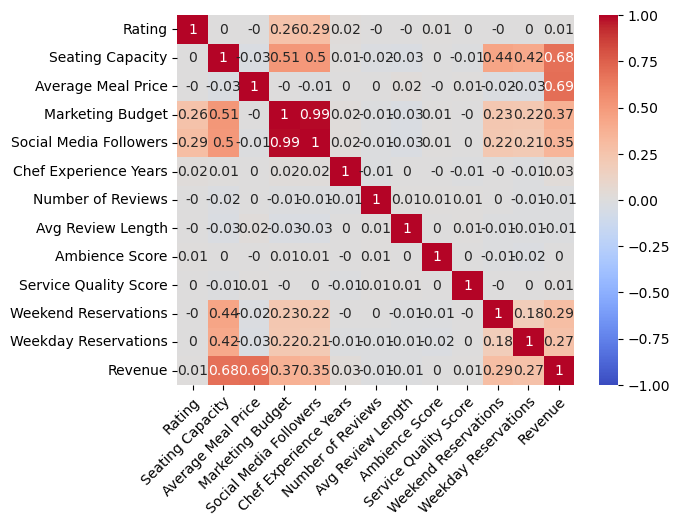

In [105]:
restaurants = restaurants.drop("Name", axis=1)
restaurants_numeric = restaurants.drop(["Location", "Cuisine", "Parking Availability"], axis=1)
sns.heatmap(restaurants_numeric.corr().round(2), annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
plt.savefig('assets/heatmap.png',bbox_inches = 'tight')
plt.show()

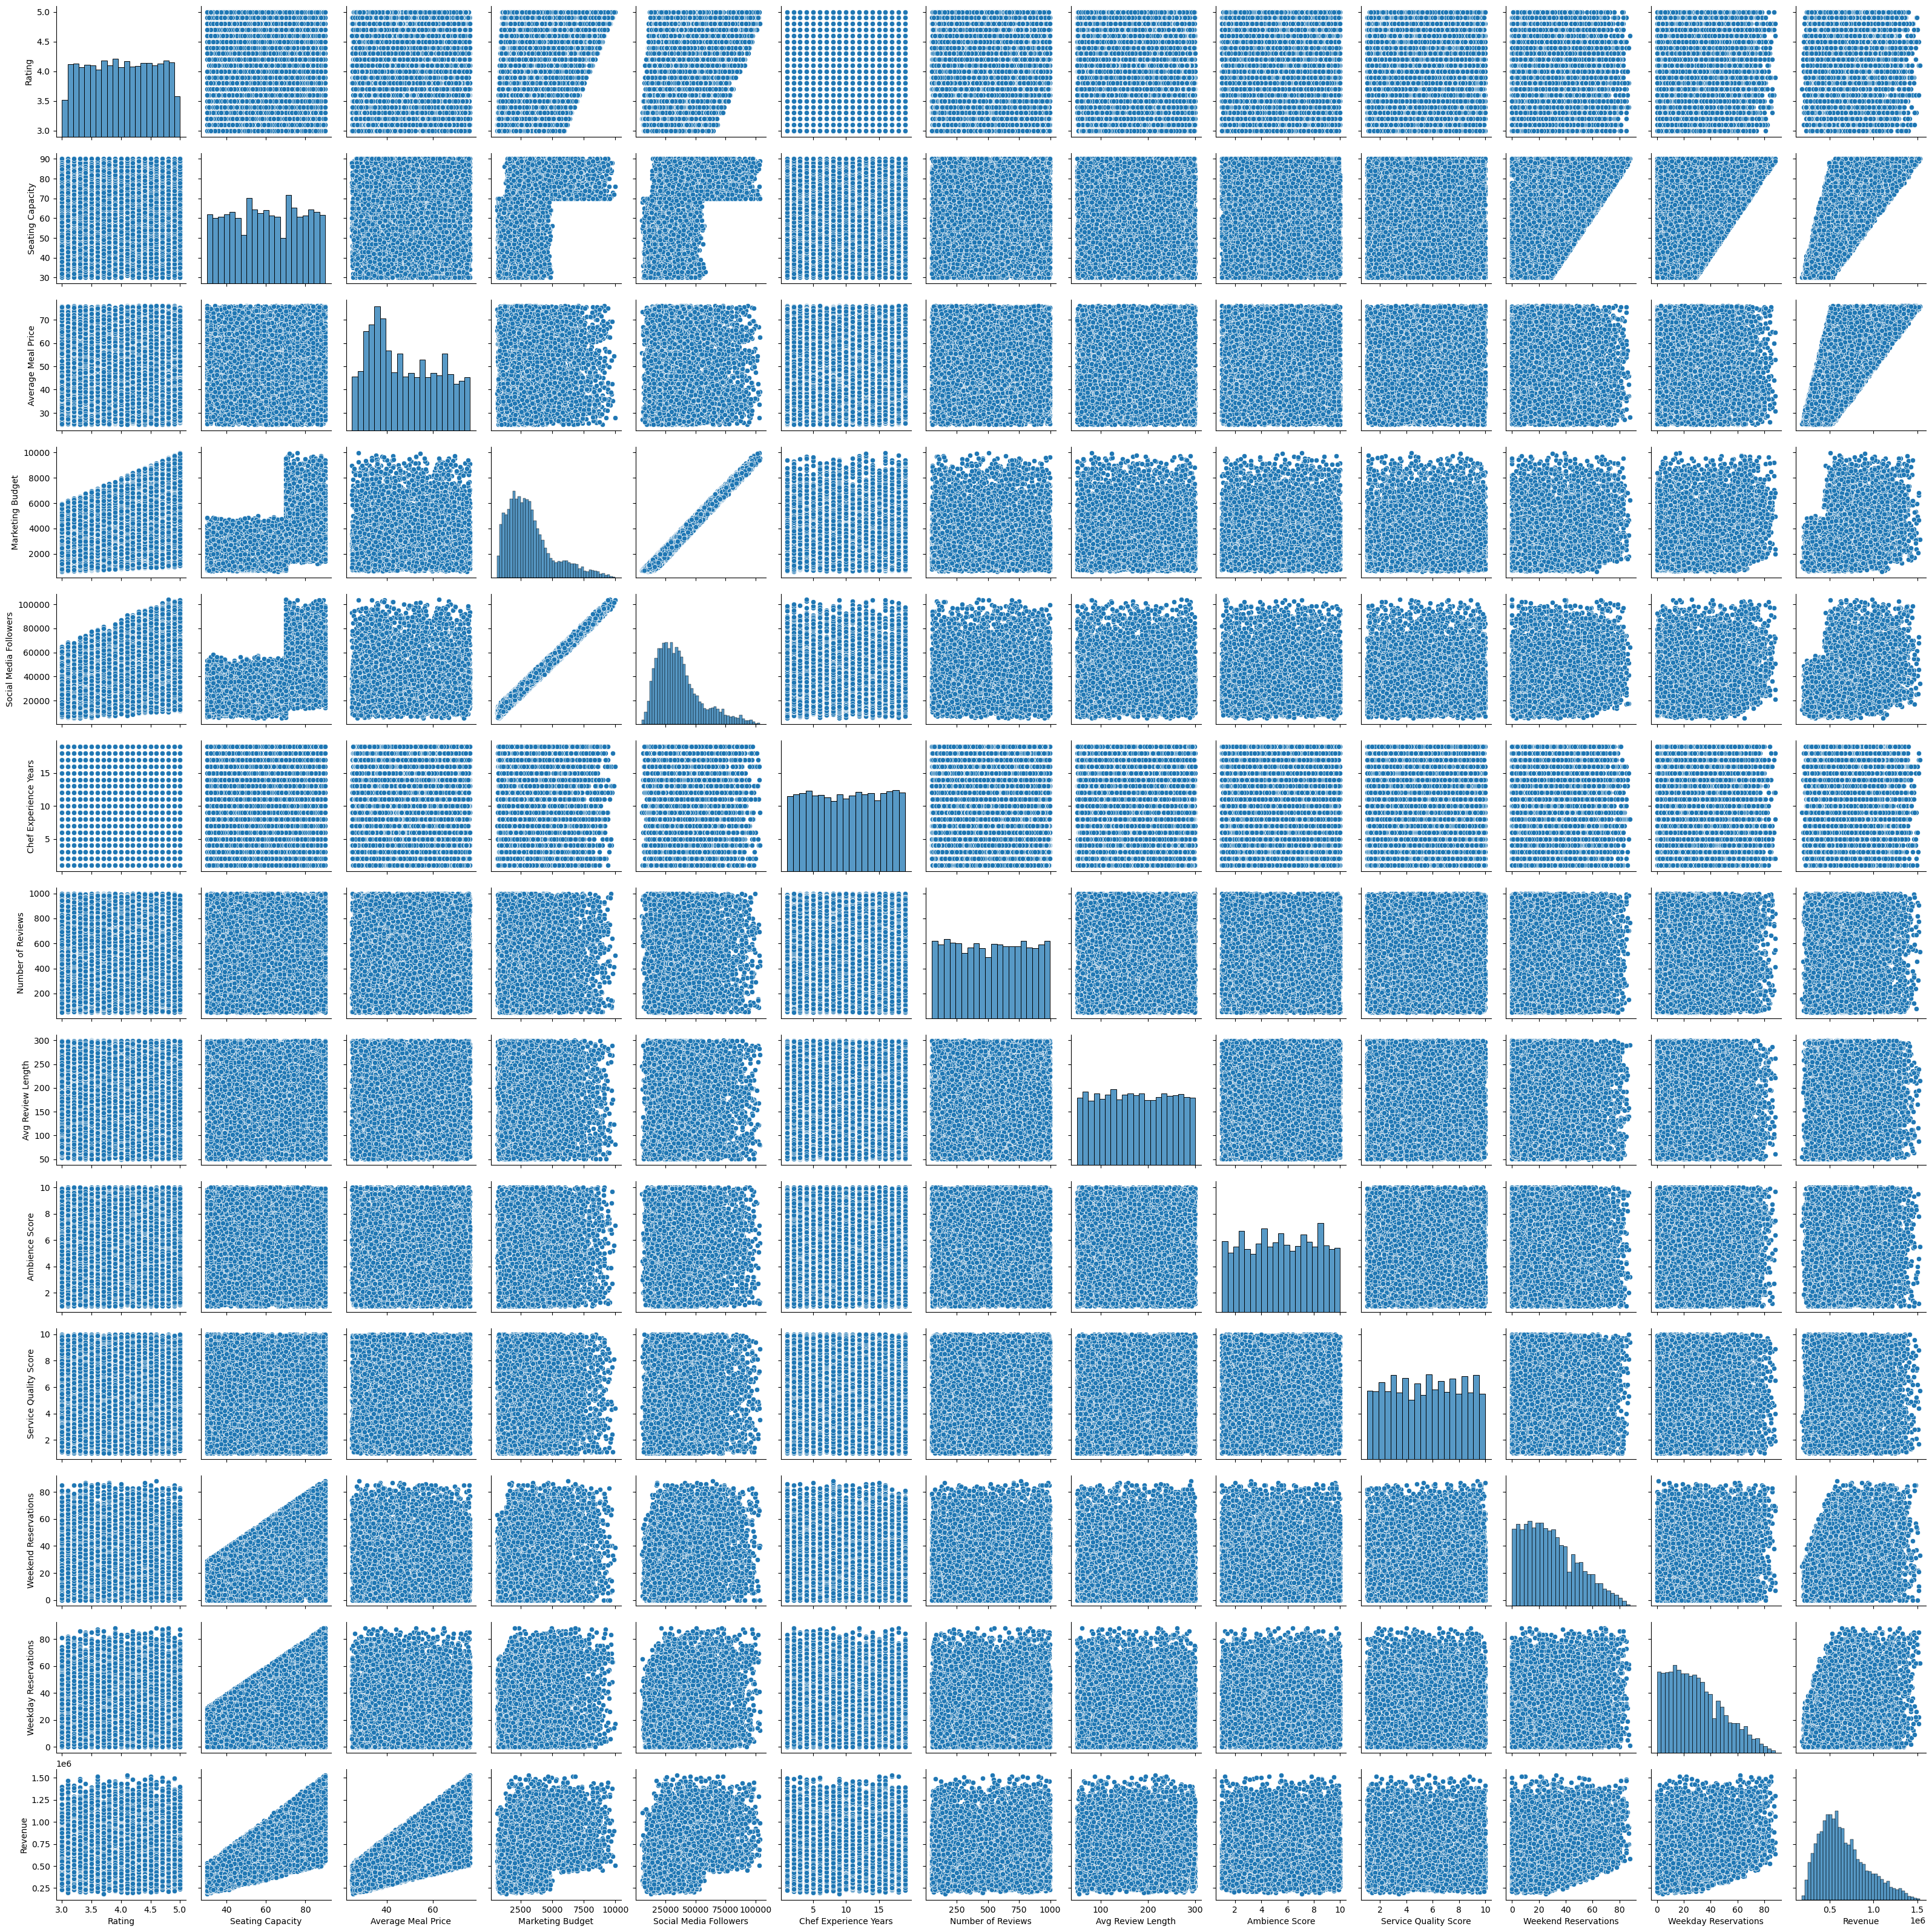

In [83]:
sns.pairplot(restaurants_numeric)
plt.savefig('assets/pairplot.png',bbox_inches = 'tight')
plt.show()

## Findings

We see that revenue is most linearly correlated with seating capacity, average meal price, marketing budget, social media followers, and number of reservations. Notably, the rating and reviews seem to have little correlation with the total revenue. Since these features are somewhat significant from observations, we could very well be observing the case where restaurants that have more resources and money to invest into their establishment will naturally have higher revenue. This is something that will be extensively explored in the future but from the diagrams above we can see early indicators. We also see that marketing budget and social media followers are extremely linearly correlated, so it may be worth dropping one of the features since they yield the same information.

In terms of the feature distributions, most are either uniformly distributed or skewed right. Notably, total revenue is skewed right, likely due to some outliers that make signficantly more revenue than others.

An important observation to explore in the future would be the difference in performance of restaurants based off their types of cuisines. We would look for trends and build models around each target cuisine to best which cuisines perform better overall compared to others. By finding multiple corrleations between various significant factors we can utilize hyperparameter tuning to develop a model that has a high accuracy of predicting restaurant revenues.

## Issues

We must acknowledge some failing points of the dataset and our initial exploration:
- Many features have unknown units. For example, our main variable, the total revenue is simply a float with no context. Is this the total revenue generated over the course of a month? A year? The restaurant's lifetime? What currency is this value in? Going forward, we will make logical guesses for units based off the present values, but as a disclaimer, we cannot guarantee such claims are accurate:
  - We assume USD for all the currencies based on the dataset's creator being located in the USA, and this giving reasonable values. Notably, this places all the restaurant's on the higher end (from \$25 to \$75 per meal).
  - We assume the marketing budget is average monthly spending, based on the amount compared to general trends.
  - We assume weekend/weekday reservations are weekly values, based on the amount compared to general trends.
  - We assume the average review length is in words.
  - We assume the total revenue is a yearly value, based on revenue generally being reported in this manner.
- The distribution of restaurants is not representative of all restaurants. For example, not all cuisine types are represented in this dataset and not all qualities of restaurant are represented. If we build a model on these restaurants then try to run it on, for example, a one star Greek restaurant, there are no guarantees the model's performance will be like it was on our original dataset. Thus, the model may only be effective on restaurants distributed similarly to this original dataset.

# Preprocessing

Our dataset is already quite clean, so little preprocessing is required. The main steps we need are scaling the data and encoding the categorical features. No imputation is required since all features are not missing any values. Additionally, since revenue is already quite linearly correlated with a few features, we do not feel it is necessary to expand our feature set.

To scale the data, we use min-max normalization, as the data is not very normally distributed.

To encode the categorical features, we use one-hot encoding for `Cuisine` and `Location`, while for `Parking Availability`, we encode simply as 0 and 1 due to the feature being a boolean value.

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split

log_transformer = Pipeline([
    ('log1p', FunctionTransformer(lambda x: np.log1p(x))),
    ('scaler', MinMaxScaler()),
])
num_transformer = MinMaxScaler()
cat_transformer = OneHotEncoder()
bool_transformer = FunctionTransformer(lambda x: x.replace({"Yes": 1, "No": 0}))

X_preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['Marketing Budget']),
        ('num', num_transformer, ['Rating', 'Average Meal Price', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations']),
        ('cat', cat_transformer, ['Location', 'Cuisine']),
        ('bool', bool_transformer, ['Parking Availability']),
    ]
)

y_preprocessor = MinMaxScaler()

X, y = restaurants.drop(["Revenue"], axis=1), restaurants["Revenue"]
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=101)
X_train = X_preprocessor.fit_transform(X_train)
X_test = X_preprocessor.transform(X_test)
y_train_raw = y_train_raw.values
y_test_raw = y_test_raw.values
y_train = y_preprocessor.fit_transform(y_train_raw.reshape(-1, 1)).ravel()
y_test = y_preprocessor.fit_transform(y_test_raw.reshape(-1, 1)).ravel()

/var/folders/kr/mr539fv50cj_g8r2lyn6nrp00000gn/T/ipykernel_9715/4284750859.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_transformer = FunctionTransformer(lambda x: x.replace({"Yes": 1, "No": 0}))
/var/folders/kr/mr539fv50cj_g8r2lyn6nrp00000gn/T/ipykernel_9715/4284750859.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_transformer = FunctionTransformer(lambda x: x.replace({"Yes": 1, "No": 0}))


# Model Selection

After preprocessing, we try a variety of different models without any tuning to see how they perform on the dataset.



In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

def cross_validate(model):
  print("Model:", model)
  scores = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error")
  print("Cross validation scores:", abs(scores))
  print("Average score:", abs(np.mean(scores)))
  print()
  return np.mean(scores)

def train_evaluate(model):
  print("Model:", model)
  y_pred = model.predict(X_train)
  print("RMSE:", root_mean_squared_error(y_train, y_pred))
  y_pred_scaled = y_preprocessor.inverse_transform(y_pred.reshape(-1, 1)).ravel()
  print("Scaled RMSE: ", root_mean_squared_error(y_train_raw, y_pred_scaled))
  print()

def test_evaluate(model):
  print("Model:", model)
  y_pred = model.predict(X_test)
  print("RMSE:", root_mean_squared_error(y_test, y_pred))
  y_pred_scaled = y_preprocessor.inverse_transform(y_pred.reshape(-1, 1)).ravel()
  print("Scaled RMSE: ", root_mean_squared_error(y_test_raw, y_pred_scaled))
  print()

Model: LinearRegression()
Cross validation scores: [0.06051549 0.06059326 0.0623276  0.06318164 0.06142556]
Average score: 0.061608709452590525

Model: DecisionTreeRegressor()
Cross validation scores: [0.06488891 0.06259553 0.06770242 0.06622759 0.06632258]
Average score: 0.0655474069681675

Model: RandomForestRegressor()
Cross validation scores: [0.04770523 0.04692462 0.04889392 0.04731474 0.04840488]
Average score: 0.04784867777329506

Model: KNeighborsRegressor()
Cross validation scores: [0.06271747 0.06293322 0.06370028 0.06162729 0.06246147]
Average score: 0.06268794670143511

Model: SVR()
Cross validation scores: [0.05509764 0.05519152 0.05500933 0.05563766 0.05512662]
Average score: 0.05521255454426386



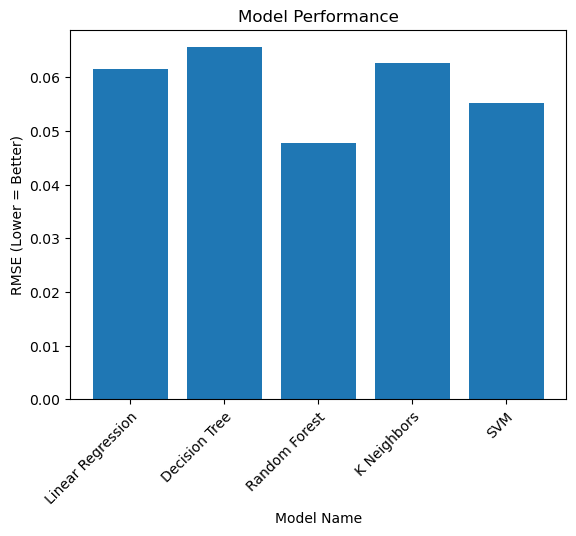

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model_names = ["Linear Regression", "Decision Tree", "Random Forest", "K Neighbors", "SVM"]
model_scores = []

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor(), SVR()]
for model in models:
    neg_rmse = cross_validate(model)
    model_scores.append(-neg_rmse)

plt.bar(model_names, model_scores)
plt.xlabel("Model Name")
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
plt.ylabel("RMSE (Lower = Better)")
plt.title("Model Performance")
plt.savefig('assets/models_performance.png',bbox_inches = 'tight')
plt.show()

Since the random forest model performed the best, we do some hyperparameter tuning on it to see if we can improve performance further, then evaluate it.

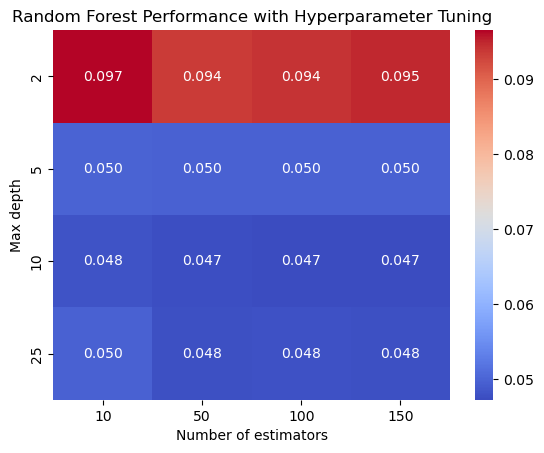

In [87]:
param_grid = {
    "n_estimators": [10, 50, 100, 150],
    "max_depth": [2, 5, 10, 25],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_

scores = -results["mean_test_score"].reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))

sns.heatmap(scores, annot=True, fmt=".3f", cmap='coolwarm',
            xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_depth'])
plt.xlabel('Number of estimators')
plt.ylabel('Max depth')
plt.title('Random Forest Performance with Hyperparameter Tuning')
plt.savefig('assets/hypparam_tuning.png',bbox_inches = 'tight')
plt.show()

In [88]:
# model = grid_search.best_estimator_
model = RandomForestRegressor()
model.fit(X_train, y_train)
train_evaluate(model)
test_evaluate(model)

Model: RandomForestRegressor()
RMSE: 0.017756941519506235
Scaled RMSE:  27650.96740128493

Model: RandomForestRegressor()
RMSE: 0.05080465722665274
Scaled RMSE:  65763.92393995123



Unfortunately, a grid search to tune hyperparameters did not affect the model's performance much. However, its performance was somewhat decent, with an RMSE of about \$42000 on the training set and about \$65000 on the testing set. For reference, the mean revenue across the dataset is about \$656000, so our first model already gives predictions generally about 10% away from the actual revenue.

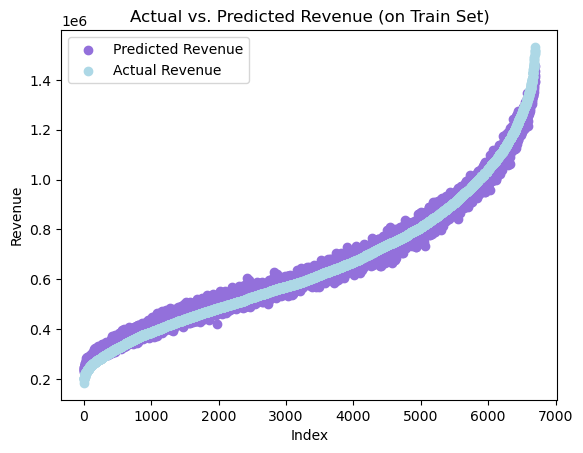

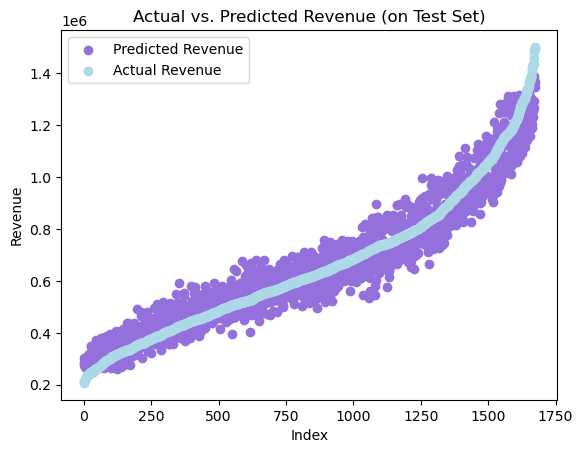

In [89]:
y_pred = model.predict(X_train)
y_pred_scaled = y_preprocessor.inverse_transform(y_pred.reshape(-1, 1)).ravel()

sorted_indices = np.argsort(y_train_raw)
plt.scatter(np.arange(len(y_pred_scaled)), y_pred_scaled[sorted_indices], label='Predicted Revenue', color='mediumpurple')
plt.scatter(np.arange(len(y_train_raw)), y_train_raw[sorted_indices], label='Actual Revenue', color='lightblue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue (on Train Set)')
plt.legend()
plt.savefig('assets/train_scatter.png')
plt.show()

y_pred = model.predict(X_test)
y_pred_scaled = y_preprocessor.inverse_transform(y_pred.reshape(-1, 1)).ravel()

sorted_indices = np.argsort(y_test_raw)
plt.scatter(np.arange(len(y_pred_scaled)), y_pred_scaled[sorted_indices], label='Predicted Revenue', color='mediumpurple')
plt.scatter(np.arange(len(y_test_raw)), y_test_raw[sorted_indices], label='Actual Revenue', color='lightblue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue (on Test Set)')
plt.legend()
plt.savefig('assets/test_scatter.png',bbox_inches = 'tight')
plt.show()

Since our model's training performance is a bit better than its testing performance, it is likely slightly overfitting the training data. Though we could theoretically spend more time tuning it with more hyperparameters, we've already seen in the grid search that the hyperparameters do not seem to have much effect on the results. Thus, we can either try considering simpler models (i.e., tuning the ones we've already looked at), or using a neural network. For variety, we will try a fully-connected neural network (MLP), which we can more thoroughly tune.

In [90]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.004316788648823834


In [91]:
from sklearn.preprocessing import PolynomialFeatures

def poly_fit(degree):
  polyFeatures = PolynomialFeatures(degree)
  X_train_poly = polyFeatures.fit_transform(X_train)
  X_test_poly = polyFeatures.fit_transform(X_test)

  model = linear_model.LinearRegression()
  model.fit(X_train_poly, y_train)
  y_train_pred = model.predict(X_train_poly)
  y_test_pred = model.predict(X_test_poly)
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  print(mse_train)
  print(mse_test)

poly_fit(2)

0.002129453546800357
0.0024255424111983286
